In [1]:
import sys
import ast
import numpy as np
from PIL import Image, ImageOps

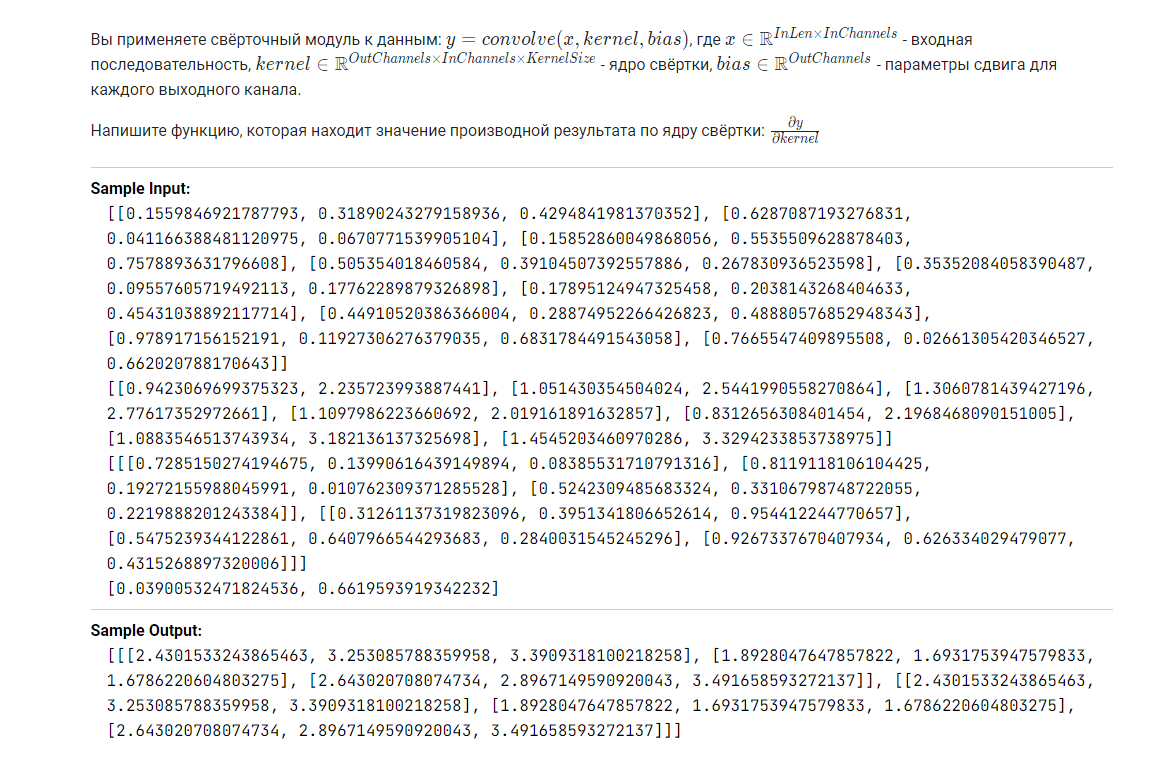

In [2]:
image = Image.open('samsung_nlp_3_8_2.png')
display(image)

In [ ]:
def parse_array(s):
    return np.array(ast.literal_eval(s))

def read_array():
    return parse_array(sys.stdin.readline())

def write_array(arr):
    print(repr(arr.tolist()))

In [ ]:
def calculate_kernel_grad(x, y, kernel, bias):
    """
    x - InLen x InChannels
    y - OutLen x OutChannels
    kernel - OutChannels x InChannels x KernelSize
    bias - OutChannels

    returns OutChannels x InChannels x KernelSize
    """
    data_heght = x.shape[0]
    kernel_count = kernel.shape[0]
    kernel_height = kernel.shape[2]
    k = np.ones(kernel[0].T.shape)
    #print(kernel_count)
    #k1 = kernel[0].T
    #k2 = kernel[1].T
    a = []
    for i in range(0, data_heght-kernel_height+1):
        a.append(x[i:i+kernel_height])
    x_columns_count = x.shape[1]
    
    
    b1 = []
    for i in range(kernel_count):
        b0 = []
        for j in range(0, data_heght-len(a)+1):
            #print(b0)
            b0.append(x[j:j+len(a)].sum(axis = 0))
        b1.append(np.array(b0).T)
    
    return np.array(b1)

In [ ]:
x = read_array()
y = read_array()
kernel = read_array()
bias = read_array()

result = calculate_kernel_grad(x, y, kernel, bias)

write_array(result)